In [4]:
import pandas as pd
import numpy as np
import scipy
import sklearn.cluster
from PIL import Image
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets,cluster
from sklearn.utils import check_random_state

Using TensorFlow backend.


In [2]:
df = pd.read_csv("compare.csv",delimiter='\t',header=None)

In [13]:
df.shape
data = df.values
#data -=np.mean(data)
data /=np.max(np.abs(data))

In [33]:
np.mean(data)

2.5118136223995124e-18

In [34]:
np.max(data)

0.99930788551899008

In [35]:
np.min(data)

-1.0

In [20]:
batch_size = 100  
original_dim = 2120   
latent_dim = 2
intermediate_dim = 512  #AE is 128
nb_epoch = 50  
epsilon_std = 1.0  
 
#encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
z_mean = Dense(latent_dim)(h)  
z_log_var = Dense(latent_dim)(h)  



#Gauss sampling,sample Z  
def sampling(args):   
    z_mean, z_log_var = args  
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2)* epsilon



z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

 
decoder_h = Dense(intermediate_dim, activation='relu')(z) 
decoder_mean = Dense(original_dim, activation='tanh')(decoder_h)




def vae_loss(x, decoder_mean):  
    xent_loss = original_dim * objectives.binary_crossentropy(x,decoder_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    return xent_loss + 1*kl_loss 

vae = Model(x, decoder_mean) 
vae.compile(optimizer='rmsprop', loss=vae_loss)  

newdata = df.values[:10000]
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:9000]
x_test = newdata[9000:10000]


In [39]:
vae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=20,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test))  

Train on 9000 samples, validate on 1000 samples
Epoch 1/20
 500/9000 [>.............................] - ETA: 2s - loss: -389.8665

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


9000/9000 [==============================] - 3s - loss: -393.3005 - val_loss: -392.3655
Epoch 2/20
9000/9000 [==============================] - 5s - loss: -390.2866 - val_loss: -390.8049
Epoch 3/20
9000/9000 [==============================] - 6s - loss: -394.4400 - val_loss: -393.1034
Epoch 4/20
9000/9000 [==============================] - 6s - loss: -397.2441 - val_loss: -396.2060
Epoch 5/20
9000/9000 [==============================] - 6s - loss: -397.8127 - val_loss: -399.7685
Epoch 6/20
9000/9000 [==============================] - 6s - loss: -398.6416 - val_loss: -400.7061
Epoch 7/20
9000/9000 [==============================] - 6s - loss: -400.0622 - val_loss: -401.6394
Epoch 8/20
9000/9000 [==============================] - 5s - loss: -402.0713 - val_loss: -402.2568
Epoch 9/20
9000/9000 [==============================] - 5s - loss: -403.3189 - val_loss: -399.5016
Epoch 10/20
9000/9000 [==============================] - 5s - loss: -404.1565 - val_loss: -405.4698
Epoch 11/20
9000/900

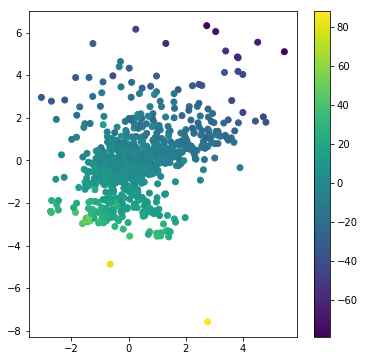

In [40]:
encoder = Model(x, z_mean)
c = np.zeros((1000,))
c = (np.sum(x_test,axis=-1))
# display a 2D plot of the digit classes in the latent space  
x_test_encoded_1 = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( (x_test_encoded_1[:, 0]) ,(x_test_encoded_1[:, 1]),c=c)  
plt.colorbar()
plt.show()


In [23]:
x_test.shape

(1000, 2120)

In [24]:
x_test_encoded_1.shape

(1000, 2)

In [26]:
np.sum(x_test,axis=-1).shape

(1000,)

In [28]:
c

92.446554878968954